In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Lab 4 – Tables

## Data 6, Summer 2024

In this lab, we will be talking all about **tables**. We use tables to store all sorts of data form sports statistics to population information. If there's data you have ever been curious about, it is very likely that the internet has a table somewhere with that data!

Tables are integral to the foundation of Data Science, and in this lab we will go over how to **query** a table. **Querying** a table is basically asking information about the table. Some examples of common queries (in English, not code):

- How many data points are there?
- Which data points have a specific characteristic?
- What is the attribute of a specific data point?
- And many more!

There are so many ways we can use tables to get information we need, and there are several existing libraries in Python that we can use to do this! In this course, we will be using the `datascience` library, and if you take Data Science classes beyond this one, you'll likely learn many more.

<div class="alert alert-warning">
The data that we'll be using in this lab contains data on <a href=https://ir.ucr.edu/stats/admission/undergraduate>University of California, Riverside's undergraduate admissions.</a> We'll be looking at this data today as we are interested in exploring the context and ethics behind education-related data (UC Riverside specifically was chosen as it was the UC that provided the most publicly accessible method of downloading the data). In this case, we are looking at the demographics of undergraduate students. This leads us to many important questions to consider: why does UC Riverside make this data publicly available? Why does it choose this format and these categories to represent students? Who or what is affected by the conclusions we make from analyzing this data? Think about these questions as you work through the lab.
</div>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 1: Basic Table Functions

<div class="alert alert-warning">
In the first part of this lab, we'll be learning about some of the various basic table functions that we can utilize in the <code>datascience</code> library in order to answer questions about student demographics at UC Riverside. In this part, we'll be focusing on the demographic categories of <code>Gender</code> and <code>IPEDS Race/Ethnicity</code> to explore what the breakdown of students at UC Riverside looks like, as well as getting a better understanding of how and why UC Riverside chose to represent their data publicly in this format.
</div>

### Loading a Table

Recall in Lab 2, we introduced the `Table.read_table` method, which takes a *file path* and constructs a `Table` with the information from that file. Let's see how this works using the file `"data/riverside.csv"`, which contains information about UC Riverside's admissions.

*Note*: If you want to check where the `riverside.csv` file is, you can look in your DataHub directory by clicking `File` > `Open...` in the top left.

In [2]:
ucr = Table.read_table("data/riverside.csv")
ucr.show(5)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,99


### Question 1.1 (Discussion)
What does each row in the dataset correspond to? In other words, what is the granularity of our data?

**SOLUTION:** Each row in the dataset corresponds to a specific status/level/gender/ethnicity stratification of students for each year.

### Question 1.2
Now that we have considered what each row in the data represents, let's take a look at how many rows we have overall. This gives us a better idea of approximately how many years and stratifications of students per year we have in our data. Assign the variable `ucr_rows` to the number of rows in `ucr`. 

You should not write an integer, but instead use one of the table attributes we have talked about so far to **calculate** the number of rows.

*Hint:* Stuck? Remember, you can reference all of the Table tools in `datascience` by looking at the Data 6 Python Reference sheet [here](http://data6.org/su23/reference). 

In [3]:
ucr_rows = ucr.num_rows # SOLUTION
ucr_rows

5021

In [4]:
assert isinstance(ucr_rows, int)

In [5]:
assert ucr_rows == 5021

<div class="alert alert-warning">
To get our analysis started, let's take a look at the <code>drop</code> and <code>relabeled</code> methods to see how we can clean up the appearance of the columns and tables to make viewing and working with the data easier.
</div>

---
### Excluding columns: `drop`

We now have information about UC Riverside's admissions in a `datascience` Table. It is common in data analysis for our tables to have columns that may not be relevant to what our exploration is focused on. One way of cleaning up our table to remove these unnecessary columns is to use the `drop` method!

Along with having columns that may not be relevant to our exploration, it is very common for our datasets to have many rows or columns with `NaN` values (`nan` stands for "Not A Number", and it is typically used to denote a missing value). **However**, it is not a good idea to blindly drop columns with several NaN values from a table. Think back to what you saw with the missing values in Lab 2. What information would have been lost if we just dropped all missing values?

Our table below fortunately doesn't have any missing values, so we'll be using the `drop` method to get rid of columns that aren't relevant in our analysis. This will make it easier to focus on the columns that we do care about. Below, let's use the `drop` method to remove a column from our table, such as the `"New/Continuing Status"` column:

In [6]:
ucr = ucr.drop("New/Continuing Status")
ucr.show(5)

Year,Level,Original Entry Type,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,International,99


*Note:* By dropping the `"New/Continuing Status"` column above, we no longer have information on whether the students in the stratification are new or continuing, so there may be some rows that appear to be duplicates. This is one of the downsides of dropping columns we aren't focusing on -- we may lose some data and context in the process! However, for our exploration's purposes, this information isn't that important, so we'll continue without it.

### Question 1.3 (Multiple Choice)
If the `"Full-Time Status"` column is dropped using the `drop` method, what would `ucr_dropped` look like? You can answer the question by assigning `q1_3` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3)`).

1. It contains only rows with NaN values.
2. It contains only the columns before the `"Full-Time Status"` column.
3. It contains all columns except the `"Full-Time Status"` column.
4. It contains the same columns as the original table, but all NaN values in the `"Full-Time Status"` column are dropped.

In [7]:
q1_3 = make_array(3) # SOLUTION

In [8]:
assert isinstance(q1_3, np.ndarray)

In [9]:
# HIDDEN
assert q1_3 == make_array(3)

---
### Changing column labels: `relabeled`

Sometimes the original column names of the data are long or not descriptive enough. We can rename column labels using the `relabeled` method. With this function, you are able to:
1. Relabel a *single column*
2. Relabel *several columns* at once

To change the names of multiple columns, we pass in an array of the old names and an array of the new names as the 2 inputs to `relabeled`.

*Note*: You may see another method called `relabel` in the `datascience` documentation. Please avoid using this, as it can change your data when you may not want to.

### Question 1.4
If we're accessing the `"IPEDS Race/Ethnicity"` column a lot, it could be cumbersome to type the long column name multiple times. Let's change the column label instead to `"Race/Ethnicity"`.

*Hint*: We've provided skeleton code for you to use.

In [10]:
# BEGIN SOLUTION NO PROMPT
ucr_relabeled = ucr.relabeled('IPEDS Race/Ethnicity', 'Race/Ethnicity')
# END SOLUTION
""" # BEGIN PROMPT
ucr_relabeled = ucr.relabeled(..., ...)
""" # END PROMPT
ucr_relabeled.show(5)

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,International,99


In [11]:
assert isinstance(ucr_relabeled, Table)

In [12]:
assert "Race/Ethnicity" in ucr_relabeled.labels

In [13]:
assert "IPEDS Race/Ethnicity" not in ucr_relabeled.labels

In [14]:
# HIDDEN
assert all(ucr_relabeled) == all(ucr.relabeled('IPEDS Race/Ethnicity', 'Race/Ethnicity'))

<div class="alert alert-warning">
In the next two sections of this part, we'll be looking at the <code>column</code> and <code>select</code> methods to discover ways of focusing on certain subsections of columns in our data.
</div>

---
### Querying the table: `column`

Looking at the first five rows of `ucr_relabeled` above, we can see some of the possible values for each of the columns. For example, in the `"Race/Ethnicity"` column, we see that there are values such as "Asian", "Black/African American", etc. In order to get a better idea of the individual values that exist within a column of our dataset, we can query the table using the `column` method. Let's use this method on `"Race/Ethnicity"`.

In [15]:
ethnicity_list = ucr_relabeled.column("Race/Ethnicity")
ethnicity_list

array(['Asian', 'Black/African American', 'Chicano/Latino', ...,
       'Domestic Unknown', 'International', 'White'],
      dtype='<U32')

One downside of doing it this way is that the list would be long and repetitive, since it will include the race/ethnicity for every row, resulting in repeated values. To work around this, we can use the `np.unique` method to tell us all the race/ethnicity values only once as they appear:

In [16]:
np.unique(ethnicity_list)

array(['American Indian/Alaskan Native', 'Asian', 'Black/African American',
       'Chicano/Latino', 'Domestic Unknown', 'International',
       'Native Hawaiian/Pacific Islander', 'Two or More Races', 'White'],
      dtype='<U32')

<div class="alert alert-warning">
This gives us a much clearer picture of what the possible representations of race/ethnicity are in this dataset. Looking at the values above, here's something to consider: do you find any issues with how the individuals can be categorized? Are there any labels that could be misleading or misrepresentative? Are there any groups of people who might not be included by this breakdown? <br><br>

We'll consider this idea of representation of the data as we continue through the lab.
</div>

---
### Picking columns: `select`

In many cases during data analysis, there will be several columns that we aren't interested in, and only a few that we are. Instead of dropping several columns as we learned about earlier, we can use the `select` method to grab only the columns we want. 

### Question 1.5
For this example, we only want to keep the `"Year"`, `"Level"`, `"Full-Time Status"`, `"Race/Ethnicity"`, and `"Fall Headcount"`  columns. Fill in the following code so that the `ucr_relabeled` table has only the relevant columns.

In [17]:
ucr_selected = ucr_relabeled.select('Year', 'Level', 'Full-Time Status', 'Race/Ethnicity', 'Fall Headcount') # SOLUTION
ucr_selected

Year,Level,Full-Time Status,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Full-Time,Asian,1129
2022,Undergraduate,Full-Time,Black/African American,90
2022,Undergraduate,Full-Time,Chicano/Latino,1219
2022,Undergraduate,Full-Time,Domestic Unknown,37
2022,Undergraduate,Full-Time,International,99
2022,Undergraduate,Full-Time,Native Hawaiian/Pacific Islander,6
2022,Undergraduate,Full-Time,Two or More Races,128
2022,Undergraduate,Full-Time,White,221
2022,Undergraduate,Full-Time,Asian,1107
2022,Undergraduate,Full-Time,Black/African American,64


In [18]:
assert isinstance(ucr_selected, Table)

In [19]:
assert ucr_selected.num_columns == 5

In [20]:
# HIDDEN
assert all(ucr_selected) == all(ucr_relabeled.select('Year', 'Level', 'Full-Time Status', 'Race/Ethnicity', 'Fall Headcount'))

*Note:* As before, we created a new table for the sake of this example. We'll continue using the `ucr` table below!

### Question 1.6 (Multiple Choice)
What is the purpose of using the `select` method in this context? You can answer the question by assigning `q1_6` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3)`).

1. To drop specific columns from the table selectively.
2. To filter rows based on a corresponding condition to keep relevant information.
3. To rearrange and rename columns in the table based on a criteria.
4. To choose specific columns to keep in the table and create a new table with only the selected columns.

In [21]:
q1_6 = make_array(4) # SOLUTION

In [22]:
assert isinstance(q1_6, np.ndarray)

In [23]:
# HIDDEN
assert q1_6 == make_array(4)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 2: More Table Functions

<div class="alert alert-warning">
In Part 1 of this lab, we learned about several Table methods that help clean up and reorganize the appearance of a table to make our analysis easier. In this part, we'll learn about a couple more Table methods that help us filter and hone in on specific aspects of our data that we're interested in. In our case, these methods will help us better explore the breakdown of the gender and race/ethnicity demographics of students at UC Riverside.
</div>

### Sorting a column: `sort`

We will now introduce a new table method: `sort`. The `sort` table method allows us to see a table's column values sorted by its values in either **decreasing** (`descending=True`) or **increasing** (`descending=False`) order.

Let's say we want to ask the question: among all years, and particularly among the different groups of students based on their demographics, which fall headcount was the highest? Sorting the table will not only allow us to see a potential trend of headcounts over the years, but it will also show us if there are any trends among which groups of students have the highest headcounts. Let's use the `sort` method to find out:

In [24]:
ucr_relabeled.sort("Fall Headcount", descending=True)

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2019,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,3432
2018,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,3240
2017,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,3191
2020,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,3093
2021,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,3052
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2970
2014,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2609
2016,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2572
2015,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2569
2013,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2503


<div class="alert alert-warning">
The results that we see above are very interesting: firstly, we notice that the highest headcounts have all been in the most recent 10 years of the dataset (2013-2022), which shows us that student admissions at UC Riverside are higher than they were in the past; and secondly, we notice that the gender and race/ethnicity category is the same for the top 10 highest headcounts, female-identifying Chicanx/Latinx students. We may wonder how this breakdown would look by major or college as well, which we'll explore later in the lab.
</div>

### Question 2.1

Using the same method but changing the `descending` parameter to True, we can discover the lowest fall headcounts. Fill in the following code using the `sort` method to accomplish this.

*Note:* Be sure to use the `ucr_relabeled` table for this question!

In [25]:
ucr_sorted_lowest = ucr_relabeled.sort("Fall Headcount", descending=False) # SOLUTION
ucr_sorted_lowest.show(5)

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Part_Time,Female,Two or More Races,1
2022,Undergraduate,Undergraduate Other,Full-Time,Female,Asian,1
2022,Undergraduate,Undergraduate Other,Full-Time,Female,Two or More Races,1
2022,Undergraduate,Undergraduate Other,Full-Time,Female,White,1
2022,Undergraduate,Undergraduate Other,Part_Time,Male,Chicano/Latino,1


In [26]:
assert isinstance(ucr_sorted_lowest, Table)

In [27]:
assert ucr_sorted_lowest.take(0).column('Fall Headcount')[0] == 1

In [28]:
assert ucr_sorted_lowest.take(1).column('Race/Ethnicity')[0] == 'Asian'

In [29]:
# HIDDEN
assert all(ucr_sorted_lowest) == all(ucr_relabeled.sort("Fall Headcount", descending=False))

<div class="alert alert-warning">
The results from this call may not be as interesting as the previous one: we notice that there's a greater breakdown of full-time statuses and new/continuing statuses among these students, and each of these categories only had one individual in the 2022 fall semester. However, if we were to take a look at the next twenty or thirty lowest rows, this may yield some more valuable information about which groups of students are witnessing much lower admission rates.
</div>

---
### Row selection: `where` and the `are` Predicates

The last table method we will talk about is the `where` method. The `where` method keeps all rows that satisfiy a particular boolean condition. It takes in a column label and an `are` statement, which can be crafted using the `are` library. These are the most important `are` library predicates, but there are many more if you would like to investigate: [explore the 'are' library here.](https://data6.org/su23/reference/#tablewhere-predicates)

| Method | Input Type | Method Description |
| --- | --- | --- |
| `are.equal_to(n)` | number | Is the value from the column equal to `n`? |
| `are.above(n)` | number | Is the value from the column above `n`? |
| `are.above_or_equal_to(n)` | number | Is the value from the column above or equal to `n`? |
| `are.below(n)` | number | Is the value from the column below `n`? |
| `are.below_or_equal_to(n)` | number | Is the value from the column below or equal `n`? |
| `are.containing(s)` | string | Is `s` contained in the string value from the given column? |
| `are.containined_in(s)` | string | Is the string value from the given column contained in `s`? |

Adding a `not_` in front of all of these predicates makes each method do the opposite of what it does (ex: `are.not_equal_to(n)`).

*Note*: As we've seen in lecture, we can achieve an **exact match** by not explicitly using an `are` predicate. That is, `where("col", are.equal_to("something")` is identical to `where("col", "something")`; the latter is shorthand for the former.

For example, if we only wanted to see the rows in which the `"Fall Headcount"` was above 500, we could use the `where()` method combined with an `are` method:

In [30]:
ucr_relabeled.where("Fall Headcount", are.above(500))

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Asian,1107
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Chicano/Latino,773
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,2365
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2970
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,White,545
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Asian,2466
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Chicano/Latino,1803
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,White,601


<div class="alert alert-warning">
In the context of our exploration of student demographics, this method can be incredibly useful. For example, if we wanted to delve further into fall headcounts that were above 3 (to avoid getting tons of random rows like we did when using the <code>sort</code> method) but below 20, in order to find groups of students that had relatively low values for fall headcounts, we could use the <code>are.strictly_between</code> predicate:
</div>

In [31]:
ucr_relabeled.where("Fall Headcount", are.strictly_between(1, 21))

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Native Hawaiian/Pacific Islander,6
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Native Hawaiian/Pacific Islander,5
2022,Undergraduate,Undergraduate Frosh,Part_Time,Female,Asian,9
2022,Undergraduate,Undergraduate Frosh,Part_Time,Female,Chicano/Latino,15
2022,Undergraduate,Undergraduate Frosh,Part_Time,Female,International,2
2022,Undergraduate,Undergraduate Frosh,Part_Time,Female,White,2
2022,Undergraduate,Undergraduate Frosh,Part_Time,Male,Asian,6
2022,Undergraduate,Undergraduate Frosh,Part_Time,Male,Black/African American,2
2022,Undergraduate,Undergraduate Frosh,Part_Time,Male,Chicano/Latino,8
2022,Undergraduate,Undergraduate Frosh,Part_Time,Male,International,6


<div class="alert alert-warning">
From this view of our data, we might be able to see more interesting trends, such as the low values of full-time Native Hawaiian / Pacific Islander undergrads in 2022. We could also chain together multiple <code>where</code> calls in order to satisfy conditions for different rows in our table. If we wanted to get even more specific in looking at these lower headcounts, we could specify the values as we did previously, but then also look for only full-time students:
</div>

In [32]:
ucr_relabeled.where("Fall Headcount", are.strictly_between(1, 21)).where("Full-Time Status", are.equal_to("Full-Time"))

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Native Hawaiian/Pacific Islander,6
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Native Hawaiian/Pacific Islander,5
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Native Hawaiian/Pacific Islander,10
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,American Indian/Alaskan Native,2
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Native Hawaiian/Pacific Islander,3
2022,Undergraduate,Undergraduate Other,Full-Time,Female,Chicano/Latino,4
2022,Undergraduate,Undergraduate Other,Full-Time,Male,Asian,4
2022,Undergraduate,Undergraduate Other,Full-Time,Male,Chicano/Latino,6
2022,Undergraduate,Undergraduate Transfer,Full-Time,Female,American Indian/Alaskan Native,4
2022,Undergraduate,Undergraduate Transfer,Full-Time,Female,Domestic Unknown,6


<div class="alert alert-warning">
You may notice that some of the rows appear to be duplicates, but they are different -- we just can't see it because we dropped the <code>"New/Continuing Status"</code> column earlier. Now, when we really limit the data like this, we can see some trends about which races/ethnicities have less students belonging to them. This table still includes both transfers and frosh, undergraduates and graduates, but we can see some consistencies with Native Hawaiian/Pacific Islander, Domestic Unknown, and Black/African American students tending to have lower numbers. This type of more complex use of the <code>where</code> method showcases just how useful it can be.
</div>

In the example above, you can see the use of the predicate `are.equal_to` in order to match strings (you can also match exact numbers this way). You can also use a shorthand of omitting the `are` predicate completely to achieve the same effect. For example, if we wanted to see the rows of only undergrads, we could use the shorthand in this way:

In [33]:
ucr_relabeled.where("Level", "Undergraduate")

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,International,99
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Native Hawaiian/Pacific Islander,6
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Two or More Races,128
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,White,221
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Asian,1107
2022,Undergraduate,Undergraduate Frosh,Full-Time,Male,Black/African American,64


When we omit the `are` predicate, the function is just using `are.equal_to` behind the scenes as the default option!

### Question 2.2
At this point in our analysis of the data, we have many tools under our belt to take a deeper look into the demographics of gender and race/ethnicity. For the following question, looking only at rows where the `"Year"` is equal to 2022, keep only the female-identifying students, and then sort by descending `"Fall Headcount"` value. Because this question is more complex and requires chaining together of multiple calls, we've provided skeleton code for you.

*Hint:* Use the shorthand in the example above with the `where` methods.

In [34]:
# BEGIN SOLUTION NO PROMPT
ucr_f_2022 = ucr_relabeled.where("Gender", "Female").where("Year", 2022).sort("Fall Headcount", descending=True) # SOLUTION NO PROMPT
# END SOLUTION
""" # BEGIN PROMPT
ucr_f_2022 = ucr_relabeled.where(..., ...).where(..., ...).sort(..., ...)
""" # END PROMPT
ucr_f_2022.show(5)

Year,Level,Original Entry Type,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,2970
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,2365
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Transfer,Full-Time,Female,Chicano/Latino,680


In [35]:
assert isinstance(ucr_f_2022, Table)

In [36]:
assert ucr_f_2022.num_rows == 94

In [37]:
assert all(ucr_f_2022.column('Gender') == 'Female')

In [38]:
assert all(ucr_f_2022.column('Year') == 2022)

<div class="alert alert-warning">
From the result above, you should see some similarities to what we found earlier when looking at the highest fall headcounts: female-identifying Chicanx/Latinx students make up some of the highest headcount values, regardless of <code>"New/Continuing Status"</code> or <code>"Original Entry Type"</code>. Additionally from this view, we can see that the next largest proportion of female-identifying students in 2022 had a race/ethnicity of Asian.
</div>

Now that we've learned a bit of surface-level information about the distribution of race/ethnicity, let's dig a little deeper into what the `"Gender"` column looks like. Utilizing the `np.unique` method that we used in the first section above, we can find the distinct values in the `"Gender"` column, to see which values are used to represent gender in this dataset.

In [39]:
# Just run this cell
np.unique(ucr.column("Gender"))

array(['Female', 'Male'],
      dtype='<U6')

As we can see above, the only two options for representing gender in this dataset are "Female" and "Male". It can often be hard to determine how to represent complex pieces of information (especially when this information is about individual people) as categorized versions in data.

### Question 2.3 (Discussion)
Because this categorization of gender may not be the best way to represent this information, what do you think some potential issues with looking only at the female-identifying individuals from our data are? Additionally, what are the implications and potential sources of harm when we have to categorize information like this?

**SOLUTION:** Female category may not accurately capture all female-identifying students, or it may include individuals who are non-binary or would otherwise pick 'Other' as their gender selection, but were only given two options. People get left out when we have to binarize qualitative information about someone that may be more complex, like gender identity.

<div class="alert alert-warning">
We can tie your takeaways from this question back to one we asked earlier in the lab, while looking at the unique values available for race/ethnicity. There are certainly some issues with the representation of this demographic as well, as many individuals have to be lumped in together (e.g. students with origins from Middle Eastern or Arab countries having to identify themselves as "White", even when that likely does not accurately capture how they would identify themselves).
</div>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 3: Data Context Exploration

<div class="alert alert-warning">
As we saw at the end of Part 2, when working with data, it is always important to consider not only the impacts that the representation of the data can have in the real world</strong>, but also <strong>the effects that the conclusions from your data analysis and visualizations can have!</strong> While we were able to observe some interesting trends in Part 2, it is important to consider what types of conclusions we're making with our analysis and how applicable they are. In this part, we'll delve further into representations of data, while also utilizing additional data from UC Riverside broken down by college to try to analyze more interesting trends with student demographics.
</div>

### A Further Look Into the `Gender` Column

Let's continue with a bit more analysis on the `"Gender"` column. As stated above, the [source of the original data](https://ir.ucr.edu/stats/enrollment/demographic) from UC Riverside also included a second dataset that displays the same admissions data, broken down by college. An interesting question you may want to consider is why UC Riverside would make this type of breakdown available alongside the original dataset of the whole university. 

Let's load the dataset into a Table object below called `ucr_college`.

In [40]:
ucr_college = Table.read_table("data/riverside_by_college.csv")
ucr_college.show(5)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,10
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Two or More Races,7


As we can see from the `"Year"` column, this dataset also contains slightly more updated information, including data from 2023. Let's take a look at the way the data is represented in the `"Gender"` column for this dataset:

In [41]:
np.unique(ucr_college.column("Gender"))

array(['Female', 'Male', 'Nonbinary', 'Unknown'],
      dtype='<U9')

### Question 3.1 (Discussion)
It looks like this dataset contains the additional values of `"Nonbinary"` and `"Unknown"` for `"Gender"`. Take a look at the "Details about the data" section [at the bottom of the website.](https://ir.ucr.edu/stats/enrollment/demographic) How was this particular variable measured? How might this impact our comparison between the conclusions we come to with this data vs. the data we previously worked with?

*Hint:* Think about what reducing the number of categories would mean.

**SOLUTION:** The website states: "Gender identity has been collected on the UC admission application only since 2016. Therefore, there is no earlier data available in the nonbinary category." Something to note is that these datasets are supposed to represent the same information. However, because UCR utilized two methods of representing the `"Gender"` column, it may not be completely appropriate to compare the raw numbers of the values alone -- some of the individuals who are in the `"Nonbinary"` or `"Unknown"` category in this dataset were likely placed into the `"Female"` or `"Male"` categories in the other dataset. Therefore, the numbers could be a bit skewed, and it may be beneficial to compare by proportions as an additional step.

Doing this type of extra basic background research on the source of our data can be incredibly helpful in our understanding of our data!

---
### Exploration of Aggregation by College

We can also use the information at the bottom of the page of the data source to find some information about how STEM majors are classified:

> "STEM Majors include those in the Bourns College of Engineering (BCOE) and the College of Natural and Agricultural Sciences (CNAS)."

Using this information, we can use the `where` method to create two different tables: one for STEM majors, and one for non-STEM majors. In the cell below, we generate the list of distinct college names at UC Riverside. As we see in the statement above, we can classify all non-STEM colleges as those in the list below, aside from the College of Engineering and the College of Natural and Agricultural Sciences.

In [42]:
np.unique(ucr_college.column("College"))

array(['Bourns College of Engineering',
       'College of Humanities, Arts, and Social Sciences',
       'College of Natural and Agricultural Sciences',
       'Graduate School of Education', 'School of Business',
       'School of Medicine', 'School of Public Policy'],
      dtype='<U48')

### Question 3.2
In the two cells below, use the `where` method to create two different tables: one for STEM majors (`ucr_stem`), and one for non-STEM majors (`ucr_nonstem`), based on which college they belong to.

In [43]:
ucr_stem = ucr_college.where("College", are.contained_in(["Bourns College of Engineering", "College of Natural and Agricultural Sciences"])) # SOLUTION
ucr_stem.show(3)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78


In [44]:
ucr_nonstem = ucr_college.where("College", are.contained_in(["College of Humanities, Arts, and Social Sciences", "Graduate School of Education", "School of Business", "School of Medicine", "School of Public Policy"])) # SOLUTION
ucr_nonstem.show(3)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,486
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,72
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,867


In [45]:
assert isinstance(ucr_stem, Table)

In [46]:
assert isinstance(ucr_nonstem, Table)

In [47]:
assert all(x in ["Bourns College of Engineering", "College of Natural and Agricultural Sciences"] for x in ucr_stem.column('College'))

In [48]:
assert all(x in ["College of Humanities, Arts, and Social Sciences", "Graduate School of Education", "School of Business", "School of Medicine", "School of Public Policy"] for x in ucr_nonstem.column('College'))

In [49]:
assert ucr_stem.num_rows == 7419

In [50]:
assert ucr_nonstem.num_rows == 9451

Now, if we wanted to do a rough tabular comparison of the STEM vs. non-STEM majors, we can group by `"Gender"` and compare the numbers.

For now, don't worry too much about understanding the syntax for the group method: we'll cover it in the next lab! The code in the two cells below simply aggregates the data by calculating the sums of the `"Fall Headcount"` column for each gender category.

In [51]:
ucr_stem_grouped = ucr_stem.group("Gender", np.sum).select(["Gender", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_stem_grouped 

Gender,Fall Headcount sum
Male,132516
Female,96494
Unknown,1063
Nonbinary,428


In [52]:
ucr_nonstem_grouped = ucr_nonstem.group("Gender", np.sum).select(["Gender", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_nonstem_grouped 

Gender,Fall Headcount sum
Female,195432
Male,136041
Unknown,1499
Nonbinary,1166


### Question 3.3 (Discussion)
From the above two tables, we can see an interesting discrepancy that we see quite often with this type of education-related data. What do you see when we compare these two tables?

**SOLUTION:** There are more male-identifying individuals represented by the STEM majors, and more female-identifying individuals repesented by the non-STEM majors. Thanks to the other two representations of `"Unknown"` and `"Nonbinary"` though, we can also see that there are more of these individuals in the non-STEM majors table as well.

Using what we learned in Lab 3, we can also visualize the data to be able to see the trends and proportions of the data more clearly. Below, we create a joined version of the headcounts split by gender for with one column containing the fall headcounts for STEM colleges, and another containing the headcounts for non-STEM colleges. Don't worry too much about the `join` method -- we'll cover it in the next lab!

In [53]:
ucr_joined_gender = ucr_stem_grouped.join('Gender', ucr_nonstem_grouped).relabeled(['Fall Headcount sum', 'Fall Headcount sum_2'], ['STEM Fall Headcount', 'Non-STEM Fall Headcount'])
ucr_joined_gender.show(5)

Gender,STEM Fall Headcount,Non-STEM Fall Headcount
Female,96494,195432
Male,132516,136041
Nonbinary,428,1166
Unknown,1063,1499


### Question 3.4
Using the `ucr_joined_gender` table, create an overlaid bar chart plotting the breakdown of the `Gender` category between the two college types. 

*Hint:* Look back to how we created overlaid bar charts in Lab 3 if you're stuck!

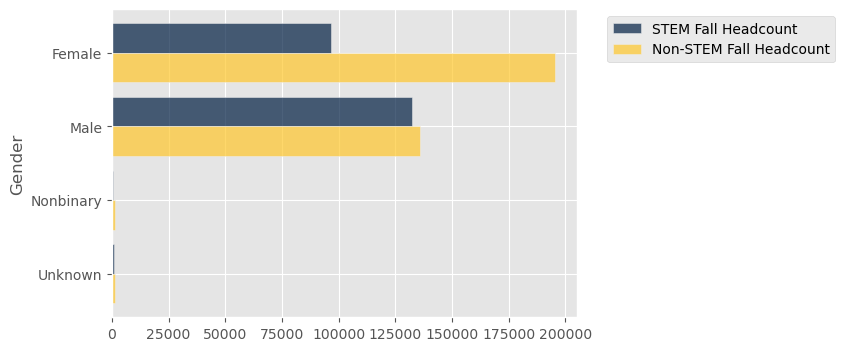

In [54]:
ucr_joined_gender.barh('Gender', overlay = True) # SOLUTION

<div class="alert alert-warning">We looked into some aspects of the students' race/ethnicities in Part 2, but now we can dig a little deeper by performing the same process of grouping our data and visualizing the distribution between the STEM and non-STEM colleges. We start by creating the tables split by STEM and non-STEM, as well as the joined version with the headcounts of both categories. </div>

In [55]:
ucr_stem_grouped_re = ucr_stem.group("IPEDS Race/Ethnicity", np.sum).select(["IPEDS Race/Ethnicity", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_stem_grouped_re 

IPEDS Race/Ethnicity,Fall Headcount sum
Asian,89621
Chicano/Latino,54809
White,43765
International,18424
Domestic Unknown,8060
Black/African American,7889
Two or More Races,7356
American Indian/Alaskan Native,440
Native Hawaiian/Pacific Islander,137


In [56]:
ucr_nonstem_grouped_re = ucr_nonstem.group("IPEDS Race/Ethnicity", np.sum).select(["IPEDS Race/Ethnicity", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_nonstem_grouped_re 

IPEDS Race/Ethnicity,Fall Headcount sum
Chicano/Latino,112421
Asian,101707
White,64222
Black/African American,18210
International,14528
Domestic Unknown,13140
Two or More Races,8466
American Indian/Alaskan Native,1082
Native Hawaiian/Pacific Islander,362


In [57]:
ucr_joined_re = ucr_stem_grouped_re.join('IPEDS Race/Ethnicity', ucr_nonstem_grouped_re).relabeled(['Fall Headcount sum', 'Fall Headcount sum_2'], ['STEM Fall Headcount', 'Non-STEM Fall Headcount'])
ucr_joined_re.show(5)

IPEDS Race/Ethnicity,STEM Fall Headcount,Non-STEM Fall Headcount
American Indian/Alaskan Native,440,1082
Asian,89621,101707
Black/African American,7889,18210
Chicano/Latino,54809,112421
Domestic Unknown,8060,13140


### Question 3.5
As you did in Question 3.4, using `ucr_joined_re`, create an overlaid bar chart between the two colleges, this time of the race/ethnicity. What do you see when we compare these two groups of students, disaggregated by race?

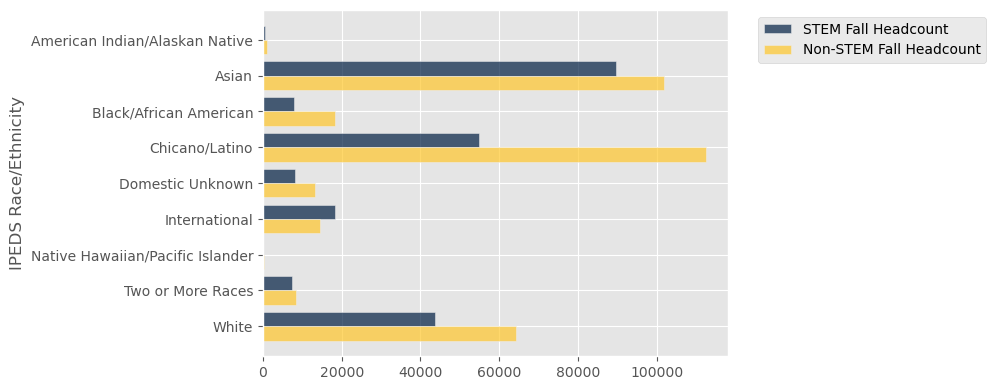

In [58]:
ucr_joined_re.barh('IPEDS Race/Ethnicity', overlay = True) # SOLUTION

**SOLUTION:** Here, we see that for non-STEM colleges, we witness a handful of the trends that we saw in Part 2, with Chicanx/Latinx and Asian students making up a large proportion, while Native Hawaiian/Pacific Islander students making up the smallest. However, again, we see a shift for the STEM colleges, where Asian students seem to make up a large majority of the students.

<div class="alert alert-warning">
As we come to an end of our exploration of student demographics from UC Riverside, consider what we've learned about the different representations of categories, as well as what sorts of conclusions we were able to effectively draw from tabular vs. visualization methods. What more could we still do in order to more concretely explore student demographics? What type of information do you think is missing that could be useful? How might you change the way that some of these demographics are represented, if data collection could be more flexible and supportive of values that lie on a continuum or are subject to changes?
</div>

Going back to an idea we posed when starting to look into the `"Gender"` column: while this type of exploration is very important and can also be informative, it is also important to remember that it is not always enough to simply look at a trend like this and state it. Ultimately, it is typically very hard to encode data about humans into numbers and categories, **because in doing so, we lose information and context about the individual we are looking at.** In your analysis in the future, try to strike a balance of looking at interesting trends in the data and considering the original context of the data you're working with.

**Finally, for reference, here is the link to the Data 6 Python Reference (our Python cheat-sheet) so you can review some of the methods we've used for tables in this lab!**

[Python Reference](http://data6.org/su23/reference)

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()